In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import f1_score,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split

In [2]:
X = pd.DataFrame(load_boston().data)
y = pd.DataFrame(load_boston().target)

In [3]:
X=X.T
X.index = load_boston().feature_names

In [4]:
X = X.T

In [5]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=6)

In [6]:
# ridgemodel = Ridge(alpha=0)
# ridgemodel.fit(X_train,y_train)

In [7]:
# r2_score(y_train,ridgemodel.predict(X_train))

In [20]:
def computeCost(features,target,weights):
    
    features = np.array(features)
    weights = np.array(weights)
    weights = weights.reshape((weights.shape[1],1))
    score = np.matmul(features,weights)
    mse   = (mean_squared_error(score,target))/2
    return mse


In [38]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
def trainLinearModel(features_train,features_test,target_train,target_test,degree):
    model = Ridge(alpha=100000, fit_intercept=False)
    model.fit(features_train,target_train)
    y_predicted = model.predict(features_test)
    print ("Mean absolute error =", round(sm.mean_absolute_error(target_test,model.predict(features_test)), 2))
    print ("Mean squared error =", round(sm.mean_squared_error(target_test, model.predict(features_test))/2, 2))
    print ("Median absolute error =", round(sm.median_absolute_error(target_test, model.predict(features_test)), 2))
    print ("Explained variance score =", round(sm.explained_variance_score(target_test, model.predict(features_test)), 2))
    print ("R2 score =", round(sm.r2_score(target_test, model.predict(features_test)), 2))
    return [model.coef_,y_predicted]

In [39]:
ts_error = []
degree = [2]
for i in degree:
    degree_processing = PolynomialFeatures(i)
    features_train = degree_processing.fit_transform(X_train)
    features_test = degree_processing.fit_transform(X_test)
    [weights, y_predicted] = trainLinearModel(features_train,features_test,y_train,y_test,i)
    ts_error.append(computeCost(np.array(features_test),np.array(y_test),weights))
    ts_error.append(computeCost(np.array(features_train),np.array(y_train),weights))

Mean absolute error = 2.92
Mean squared error = 8.44
Median absolute error = 2.09
Explained variance score = 0.8
R2 score = 0.8


In [40]:
print(ts_error)

[8.436809997366863, 5.280945168657677]


In [35]:
pd.DataFrame(X).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
pd.DataFrame(y).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [26]:
pd.DataFrame(y_predicted).head()

,0
0,23.847428
1,25.501434
2,29.597341
3,21.857652
4,21.381412


<IPython.core.display.Javascript object>


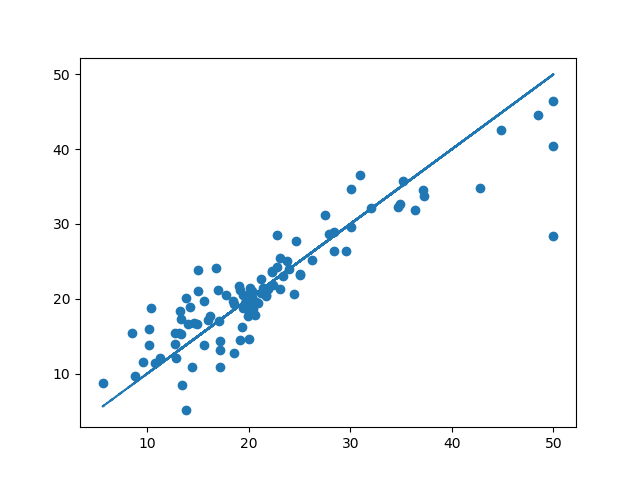

In [30]:
plt.scatter(y_test,y_predicted)
plt.plot(y_test,y_test,'--')